### Student Information
Name: 陳彥榕

Student ID: 313612505

GitHub ID:  jungswork (Jonedowe)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [193]:
### Begin Assignment Here

In [194]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [195]:
#匯入本題資料庫
stock_sentiment_data = pd.read_csv(r"C:\Users\user\Desktop\DM_Project\DM2025Labs\DM2025-Lab1-Exercise\newdataset\Reddit-stock-sentiment.csv")

#檢視資料內容前 4 筆資料(ex2)
stock_sentiment_data[0:4]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0


In [196]:
#檢視目錄名稱(由於不是由scikit-learn索取資料，故不使用.target_names)
stock_sentiment_data.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

## reddit論壇資料說明，篩選出可能影響情緒指標的合適特徵
| 欄位 | 說明 | 篩選原因
|------|---------|------|
| **type** | 貼文類型（如:貼文、留言）| 與留言相比貼文通常提供較完整說明，可能影響情緒，故採用
| **datetime** | 日期 | <span style="color:red">雖財經事件發生的時間點可能影響群眾情緒，但 text 會提及財經事件，重疊性高(適度減少特徵避免過擬合)，故不採用</span>
| **post_id** | 發文人的名稱 | <span style="color:red">為作者網站名稱與情緒無關，不採用</span>
| **subreddit** | 子論壇名稱 | <span style="color:red">論壇名稱與情緒應只有微小關聯(如: 較大眾的論壇，不過在Reddict應不具有足夠權威的論壇)，不採用</span>
| **title** | 貼文標題 | 與情緒高度相關，故採用
| **author** | 作者 | 越有影響力的人發文越容易影響群眾情緒，故採用
| **url** | 網址 | <span style="color:red">與情緒指標無關，不採用</span>
| **upvotes** | 推文數 | 認同文章內容，故採用
| **downvotes** | 倒讚數 | <span style="color:red">倒讚表示不認同文章，判斷與不影響情緒，不採用</span>
| **upvote_ratio** | 推文比率 | <span style="color:red">認同文章內容，原採用，但因經過前處理發現空值過多，後續不採用</span>
| **text** | 內文 | 與情緒高度相關，故採用
| **subjectivity** | 貼文主觀指標 (0~1) | 與情緒高度相關，故採用
| **polarity** | 貼文理性指標 (-1~1) |與情緒高度相關，故採用
| **sentiment** | 情緒指標 (-1,0,1) | 本次資料探勘主要指標，故採用
| **entities** | 關鍵字 | <span style="color:red">與 text 及 title 重疊性高(適度減少特徵避免過擬合)，故不採用</span>
| **label** | 標籤 | <span style="color:red">與情緒指標相同，故不採用</span>



In [197]:
#資料筆數
len(stock_sentiment_data)

847

In [198]:
#檢視第 0 筆資料(row)
stock_sentiment_data.iloc[0]


type                                                    comment
datetime                                    2025-04-11 17:29:56
post_id                                                 mmli62w
subreddit                                        wallstreetbets
title           Retardation is on the menu boys! WSB is so back
author                                             StickyTip420
url                        https://i.redd.it/0yq2ftren8ue1.jpeg
upvotes                                                       0
downvotes                                                   NaN
upvote_ratio                                                NaN
text                                           Calls on retards
subjectivity                                                1.0
polarity                                                   -0.9
sentiment                                                  -1.0
entities                                                     []
label                                   

In [199]:
#檢視第 0 行資料(column)
stock_sentiment_data.iloc[:,0]

0      comment
1      comment
2      comment
3         post
4      comment
        ...   
842    comment
843    comment
844       post
845    comment
846    comment
Name: type, Length: 847, dtype: object

In [200]:
# 使用 loc property
print(stock_sentiment_data.loc[:, "type"])

print(stock_sentiment_data.loc[0:10, "author"])

0      comment
1      comment
2      comment
3         post
4      comment
        ...   
842    comment
843    comment
844       post
845    comment
846    comment
Name: type, Length: 847, dtype: object
0             StickyTip420
1     Comfortable-Dog-8437
2             Btankersly66
3                emiljenfn
4             Just-Big6411
5              PolarNimbus
6                stoniey84
7                OSRSkarma
8                 Blondbox
9                   Zumuru
10              MitchCurry
Name: author, dtype: object


In [201]:
#檢視 sentiment
stock_sentiment_data["sentiment"][0: 10]

0   -1.0
1    1.0
2    0.0
3    1.0
4    0.0
5    1.0
6   -1.0
7    1.0
8    1.0
9    0.0
Name: sentiment, dtype: float64

In [202]:
#檢視有幾種 type
types = []
for i in range(len(stock_sentiment_data.loc[:, "type"])):
    if stock_sentiment_data.loc[:, "type"][i] not in types:
        types.append(stock_sentiment_data.loc[:, "type"][i])
print(types)
#有點笨的方法，後須可用pandas的 unique() 處理

['comment', 'post']


In [203]:
# practice exercise 1 (較沒必要的練習，因其本來就分行，並無取代的必要\n後分行的需求)
for i in range(3):
    print(f"example{i+1}")
    print("\n".join(stock_sentiment_data.iloc[i].astype(str)))

example1
comment
2025-04-11 17:29:56
mmli62w
wallstreetbets
Retardation is on the menu boys! WSB is so back
StickyTip420
https://i.redd.it/0yq2ftren8ue1.jpeg
0
nan
nan
Calls on retards
1.0
-0.9
-1.0
[]
-1.0
example2
comment
2025-04-12 1:12:19
mmnu7v9
wallstreetbets
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Comfortable-Dog-8437
https://i.redd.it/7tl6puv9waue1.jpeg
-15
nan
nan
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
0.1777777777777777
0.0833333333333333
1.0
['Stunt', 'company', 'deal', 'place']
0.0
example3
comment
2025-04-10 15:09:41
mmeevio
StockMarket
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Btankersly66
https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669
1
nan
nan
Seeing lots of red 

In [204]:
#建立表格(由於本身即 csv 非 list 上不需要使用 dmh function)
stock_df = pd.DataFrame(stock_sentiment_data, columns= ['type', 'title', 'author', 'upvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment'])

display(stock_df[0:3])


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0


In [205]:
#取出部分表格 "type", "sentiment"
stock_df[0:3][["type", "sentiment"]]

,type,sentiment
0,comment,-1.0
1,comment,1.0
2,comment,0.0


In [206]:
# practice exercise 2 
#1 Use query function
print("method 1 query function")
df1 = stock_df.query("sentiment == 0")
display(df1)
print("=======================================================")

#2 Use Boolean Indexing
print("method 2 Boolean Indexing")
df2 = stock_df[stock_df["type"] == "comment"]
display(df2)
print("=======================================================")

# Use Multiple Conditions
print("method 3 Multiple Conditions")
df3 = stock_df[(stock_df["sentiment"] == 1) & (stock_df["type"] == "comment")]
display(df3)

method 1 query function


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,1,NaN,He didn’t say thank you.,0.0,0.0,0.0
9,comment,Any cheap stocks under $10?,Zumuru,2,NaN,HLGN is $10. Hurry and catch it now before it ...,0.0,0.0,0.0
10,comment,r/Stocks Daily Discussion & Fundamentals Frida...,MitchCurry,3,NaN,It's a copy/paste from a Bloomberg terminal.,0.0,0.0,0.0
14,comment,r/Stocks Daily Discussion & Fundamentals Frida...,Odd-Temperature-791,8,NaN,USA begging China to call them,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,NaN,Invest now it is going to shoot up tomorrow,0.0,0.0,0.0
843,comment,$ U.S. dollar value (crashing),lulububudu,2,NaN,Where can I read this?,0.0,0.0,0.0
844,post,Analyst Recommendations,saasfin,1,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,0.0,0.0
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,NaN,i sold my puts so i expect cheeto to declare w...,0.0,0.0,0.0


method 2 Boolean Indexing


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0
4,comment,The Trump administration is begging Xi Jinping...,Just-Big6411,1,NaN,He didn’t say thank you.,0.000000,0.000000,0.0
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0
...,...,...,...,...,...,...,...,...,...
841,comment,The Trump administration is begging Xi Jinping...,le_mihai,1,NaN,So countries “begging to stop the tariffs” and...,0.000000,0.000000,0.0
842,comment,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,1,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0
843,comment,$ U.S. dollar value (crashing),lulububudu,2,NaN,Where can I read this?,0.000000,0.000000,0.0
845,comment,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,10,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0


method 3 Multiple Conditions


,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
5,comment,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,16,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0
7,comment,Retardation is on the menu boys! WSB is so back,OSRSkarma,-3,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0
8,comment,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,1,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0
11,comment,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
826,comment,BREAKING: China raises tariffs on U.S. goods t...,Danat_shepard,1,NaN,That's how you get black market lol \r\n\r\nCh...,0.573333,0.366667,1.0
827,comment,Trump: We Are Doing Really Well On Our Tariff ...,jacobatz,1,NaN,"Exciting, I guess that’s one way to characteri...",0.800000,0.300000,1.0
831,comment,US consumer sentiment plummets to second-lowes...,CulturalAtmosphere85,12,NaN,Things will get better soon. Once those 9 tran...,0.260000,0.165000,1.0
832,comment,Anyone see the O3 Mining private placement?,CombinationLittleD,1,NaN,NICE. Cannot complain.,1.000000,0.600000,1.0


In [207]:
# practice exercise 3
#取每10筆 type 為 comment 的前 5 筆資料
stock_df[stock_df["type"] == "comment"][::10][0:5]

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,NaN,Calls on retards,1.000000,-0.90000,-1.0
11,comment,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,9,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.00000,1.0
21,comment,If you had $10k in cash…,Either_Breadfruit_90,1,NaN,GEO WM,0.000000,0.00000,0.0
31,comment,Best EV / green mining stocks?,[deleted],1,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.10788,1.0
41,comment,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,1,NaN,And plug,0.000000,0.00000,0.0


In [208]:
# check missing values
stock_df.isnull()

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,True,False,False,False,False
843,False,False,False,False,True,False,False,False,False
844,False,False,False,False,False,False,False,False,False
845,False,False,False,False,True,False,False,False,False


In [209]:
# output the total miss value by using TA's function
import helpers.data_mining_helpers as dmh

stock_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,0,0,0,0


In [210]:
# pracrice exercise 4
#設定 axis =1，表示檢查 row 內是否有空值
 
stock_df.isnull().apply(lambda x : dmh.check_missing_values(x),axis = 1)

0      (The amoung of missing records is: , 1)
1      (The amoung of missing records is: , 1)
2      (The amoung of missing records is: , 1)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 1)
                        ...                   
842    (The amoung of missing records is: , 1)
843    (The amoung of missing records is: , 1)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 1)
846    (The amoung of missing records is: , 1)
Length: 847, dtype: object

In [211]:
print(len(stock_df))

847


In [212]:
#data length
# 移除 missing data
stock_clean_data = stock_df.dropna(inplace = False)

# check
display(stock_df.isnull().apply(lambda x: dmh.check_missing_values(x))) #已移除空值

# check data length
print(f"移除空值前資料數: {len(stock_df)}")
print(f"移除空值資料數: {len(stock_clean_data)}")



,type,title,author,upvotes,upvote_ratio,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,783,0,0,0,0


移除空值前資料數: 847
移除空值資料數: 64


In [213]:
# 由於資料僅剩可憐的 64 筆，不利於資料探勘，故將 upvote_ratio 移除，分析特徵降為 8 筆
stock_df.drop("upvote_ratio", axis=1, inplace=True)

# check missing values
display(stock_df.isnull().apply(lambda x: dmh.check_missing_values(x)))

#check
print(stock_df.shape)

,type,title,author,upvotes,text,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0


(847, 8)


In [214]:
#檢查是否有duplicate data
sum(stock_df.duplicated())

21

In [215]:
#清除duplicate data
stock_df.drop_duplicates(keep= 'first', inplace= True) #保留第1筆重複的資料並直接更動stock_df，與 master 不同此處重複的資料可用而非dummy_data

#check
stock_df.shape #清除 11 筆 duplicate data


(826, 8)

## Sampling

In [216]:
# 取 400 筆資料做 sample(固定隨機資料使其可重現)
stock_df_sample = stock_df.sample(n = 400, random_state= 42)

stock_df_sample.shape

(400, 8)

In [217]:
# practice exercise 6
# first difference : 採用取樣使資料數不相同，原先資料數量為 826 筆，經由sample function 隨機抽取 400 筆資料
print("1.length change")

#檢視 stock_df dataframe 欄位
print(f"stock_df dataframes form : {stock_df.shape}")

#檢視 stock_df_sample dataframe 欄位
print(f"stock_df_sample dataframes form : {stock_df_sample.shape}")

print("================================================================")


# second difference : 抽區資料為隨機，故原先的資料順序將不同
print("2.order change")

#展示 stock_df 的前4筆資料
print("stock_df dataframe :")
display(stock_df[0:4])

#展示 stock_df_sample 的前4筆資料
print("stock_df_sample dataframe :")
display(stock_df_sample[0:4])

print("================================================================")


# third difference : 抽樣比例可能不同

#計算 X 及 X_sample 的總資料數
stock_df_data_num = len(stock_df)
stock_df_sample_data_num = len(stock_df_sample)

#計算 stock_df 及 stock_df_sample 中 type == comment的資料數
comment_data_num_in_stock_df = len(stock_df[stock_df["type"] == "comment"])
comment_data_num_in_stock_df_sample = len(stock_df_sample[stock_df_sample["type"] == "comment"])

#求取比例(球到小數點第二位)
print(f"X dataframes comp.graphics propotion : {comment_data_num_in_stock_df/stock_df_data_num:.2f}")
print(f"X_sample dataframes comp.graphics propotion : {comment_data_num_in_stock_df_sample/stock_df_sample_data_num:.2f}")


1.length change
stock_df dataframes form : (826, 8)
stock_df_sample dataframes form : (400, 8)
2.order change
stock_df dataframe :


,type,title,author,upvotes,text,subjectivity,polarity,sentiment
0,comment,Retardation is on the menu boys! WSB is so back,StickyTip420,0,Calls on retards,1.000000,-0.900000,-1.0
1,comment,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0
2,comment,How do you feel about a sitting president maki...,Btankersly66,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0
3,post,Who knows more? $VMAR,emiljenfn,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0


stock_df_sample dataframe :


,type,title,author,upvotes,text,subjectivity,polarity,sentiment
659,comment,How do you feel about a sitting president maki...,Mrtoyhead,1,If prison was acceptable for Martha Stewart th...,0.55,0.35,1.0
174,comment,Weekend Discussion Thread for the Weekend of A...,HiTechSoldierplus,8,I still cannot believe that I didn't sell the ...,0.00,0.00,0.0
67,comment,Someone post the hotline please.,Antique-Athlete-8838,1,Oh my gourd!,0.00,0.00,0.0
168,comment,r/Stocks Daily Discussion & Fundamentals Frida...,mazzaschi,1,The obvious can also be refreshing from CNBC: ...,0.75,0.25,1.0


X dataframes comp.graphics propotion : 0.95
X_sample dataframes comp.graphics propotion : 0.94


type
comment    783
post        43
Name: count, dtype: int64


<Axes: title={'center': 'Type Disyribution'}, xlabel='type'>

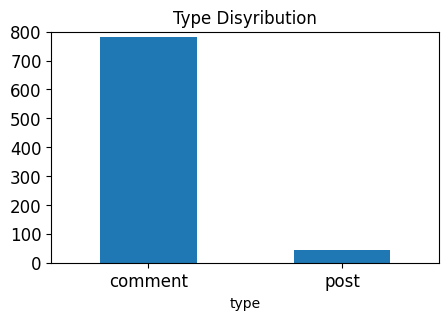

In [218]:
# 由 Dataframe 製圖
# 檢視 type 數量分佈

# 檢視數量
print(stock_df.type.value_counts())

# 繪圖
stock_df.type.value_counts().plot(kind= 'bar',
                                  ylim= (0, 800),
                                  title= "Type Disyribution",
                                  rot= 0, fontsize= 12 ,figsize= (5, 3))



<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

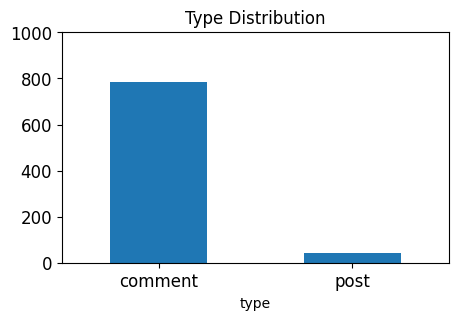

In [219]:
# practice 7: 調整 ylim 不要將上限寫死
stock_df.type.value_counts().plot(kind= 'bar',
                                  ylim= (0, stock_df.type.value_counts().max()+220),
                                  title= "Type Distribution",
                                  rot= 0, fontsize= 12 ,figsize= (5, 3))


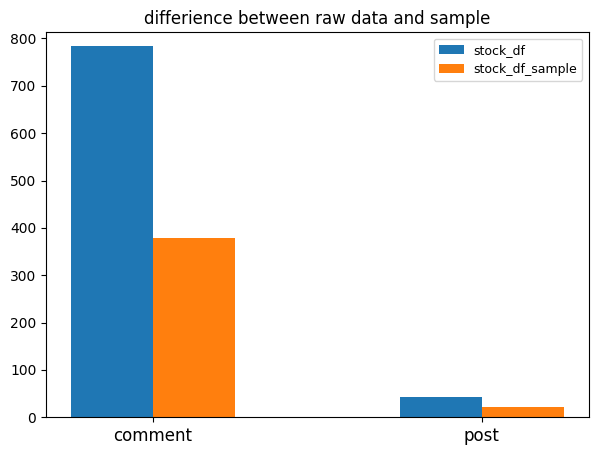

In [220]:
#practice 8: plot picture the betweem differience raw data and sample
import matplotlib.pyplot as plt


# 建立底圖
plt.figure(figsize=(7, 5))

#設定 y 軸參數
y_data = stock_df.type.value_counts()
y_data_sample = stock_df_sample.type.value_counts()

#設定 x 軸參數
category = stock_df["type"].unique()
x = np.arange(len(category))
plt.xticks(x,
           category,
           fontsize = 12,
           rotation = 0)

#條狀圖位置設定
width = 0.25
plt.bar(x-width/2, y_data, width=0.25, label = "stock_df")
plt.bar(x+width/2, y_data_sample, width=0.25, label = "stock_df_sample")

plt.ylim(0, max(y_data.max(), y_data_sample.max()) + 30)

#圖例
plt.legend(fontsize= 9)

#標題設定
plt.title("differience between raw data and sample")

#show the figure
plt.show()


#### 5.2 Feature creation

In [221]:
# use TA's function include nltk
stock_df["unigrams"] = stock_df["text"].apply(lambda x: dmh.tokenize_text(x))

# check
print(stock_df[0:4]["unigrams"])

# check columns
stock_df.columns # include new column

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


Index(['type', 'title', 'author', 'upvotes', 'text', 'subjectivity',
       'polarity', 'sentiment', 'unigrams'],
      dtype='object')

In [222]:
# turn into list
#list(stock_df["unigrams"])

#### 5.3Feature subset selection

In [223]:
# use sklearn to tokenize, it's a difference way that using nltk

# create an object
count_vect = CountVectorizer()

# turn into token sparse matrix
stock_token_counts = count_vect.fit_transform(stock_df["text"])
print(stock_token_counts[3])


  (np.int32(0), np.int32(2706))	2
  (np.int32(0), np.int32(2024))	1
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(175))	4
  (np.int32(0), np.int32(2161))	2
  (np.int32(0), np.int32(3848))	8
  (np.int32(0), np.int32(2687))	4
  (np.int32(0), np.int32(4145))	3
  (np.int32(0), np.int32(2422))	3
  (np.int32(0), np.int32(3823))	3
  (np.int32(0), np.int32(2026))	3
  (np.int32(0), np.int32(2149))	3
  (np.int32(0), np.int32(3263))	1
  (np.int32(0), np.int32(4190))	2
  (np.int32(0), np.int32(3313))	1
  (np.int32(0), np.int32(3849))	2
  (np.int32(0), np.int32(856))	2
  (np.int32(0), np.int32(4271))	3
  (np.int32(0), np.int32(3437))	3
  (np.int32(0), np.int32(3930))	4
  (np.int32(0), np.int32(1837))	1
  (np.int32(0), np.int32(195))	1
  (np.int32(0), np.int32(4066))	1
  (np.int32(0), np.int32(560))	1
  (np.int32(0), np.int32(18))	3
  :	:
  (np.int32(0), np.int32(1068))	1
  (np.int32(0), np.int32(1306))	1
  (np.int32(0), np.int32(950))	1
  (np.int32(0), np.int32(3911))	2
  (np.int32(0),

In [224]:
# peek the token
count_vect.get_feature_names_out()[1542]

'felt'

In [225]:
# practice exercise 9
# build an analyzer to clean unnecessary token and peek the word directly
analyze = count_vect.build_analyzer()
analyze(stock_df["text"][3])

['vision',
 'marine',
 'technologies',
 'inc',
 'is',
 'rewriting',
 'the',
 'watercraft',
 'rulebook',
 'their',
 'collaboration',
 'with',
 'shaun',
 'torrente',
 'has',
 'achieved',
 'the',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'on',
 'water',
 'this',
 'isn',
 'just',
 'about',
 'speed',
 'it',
 'about',
 'propelling',
 'electric',
 'boating',
 'into',
 'new',
 'era',
 'their',
 'cutting',
 'edge',
 'technology',
 'combined',
 'with',
 'torrente',
 'skill',
 'is',
 'making',
 'waves',
 'that',
 'll',
 'ripple',
 'for',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'inc',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'on',
 'water',
 'with',
 'shaun',
 'torrente',
 'the',
 'feat',
 'highlights',
 'the',
 'power',
 'of',
 'electric',
 'boating',
 'and',
 'pushes',
 'the',
 'limits',
 'of',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'and',
 'danfoss',
 'editron',
 'contribute',
 'to',
 

In [226]:
# comparison of anlayze and CountVectorizer()
print(f"analze: {analyze(stock_df['text'][0])}")

print("===================================================================================")
print(f"CountVectorizer():\n{stock_token_counts[0]}")


analze: ['calls', 'on', 'retards']
CountVectorizer():
  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [238]:
# practice exercise 10 

# convert sparse matrix to normal array, same to the Master we select top 5 record and top 100 tokens to analze
print(stock_token_counts[0:5, 0:100].toarray())

#由於沒有 1 的數量在我的資料中，故改找 3 
#找尋第 4 筆資料前 100 個特徵中有 3 的 index
forth_data = stock_token_counts[3 , 0:100].toarray().flatten() #使用 flatten method 將二維矩陣攤成一維

for i in range(1,len(forth_data)):
    if forth_data[i] == 3:
        print(f"There are 3 in index: {i}")

        #找出 index = 18 的詞彙，由上面教的 get_feature_names_out() 求出
        word = count_vect.get_feature_names_out()[i]
        print(f"That feature represents: '{word}'.")


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

(400, 2783)

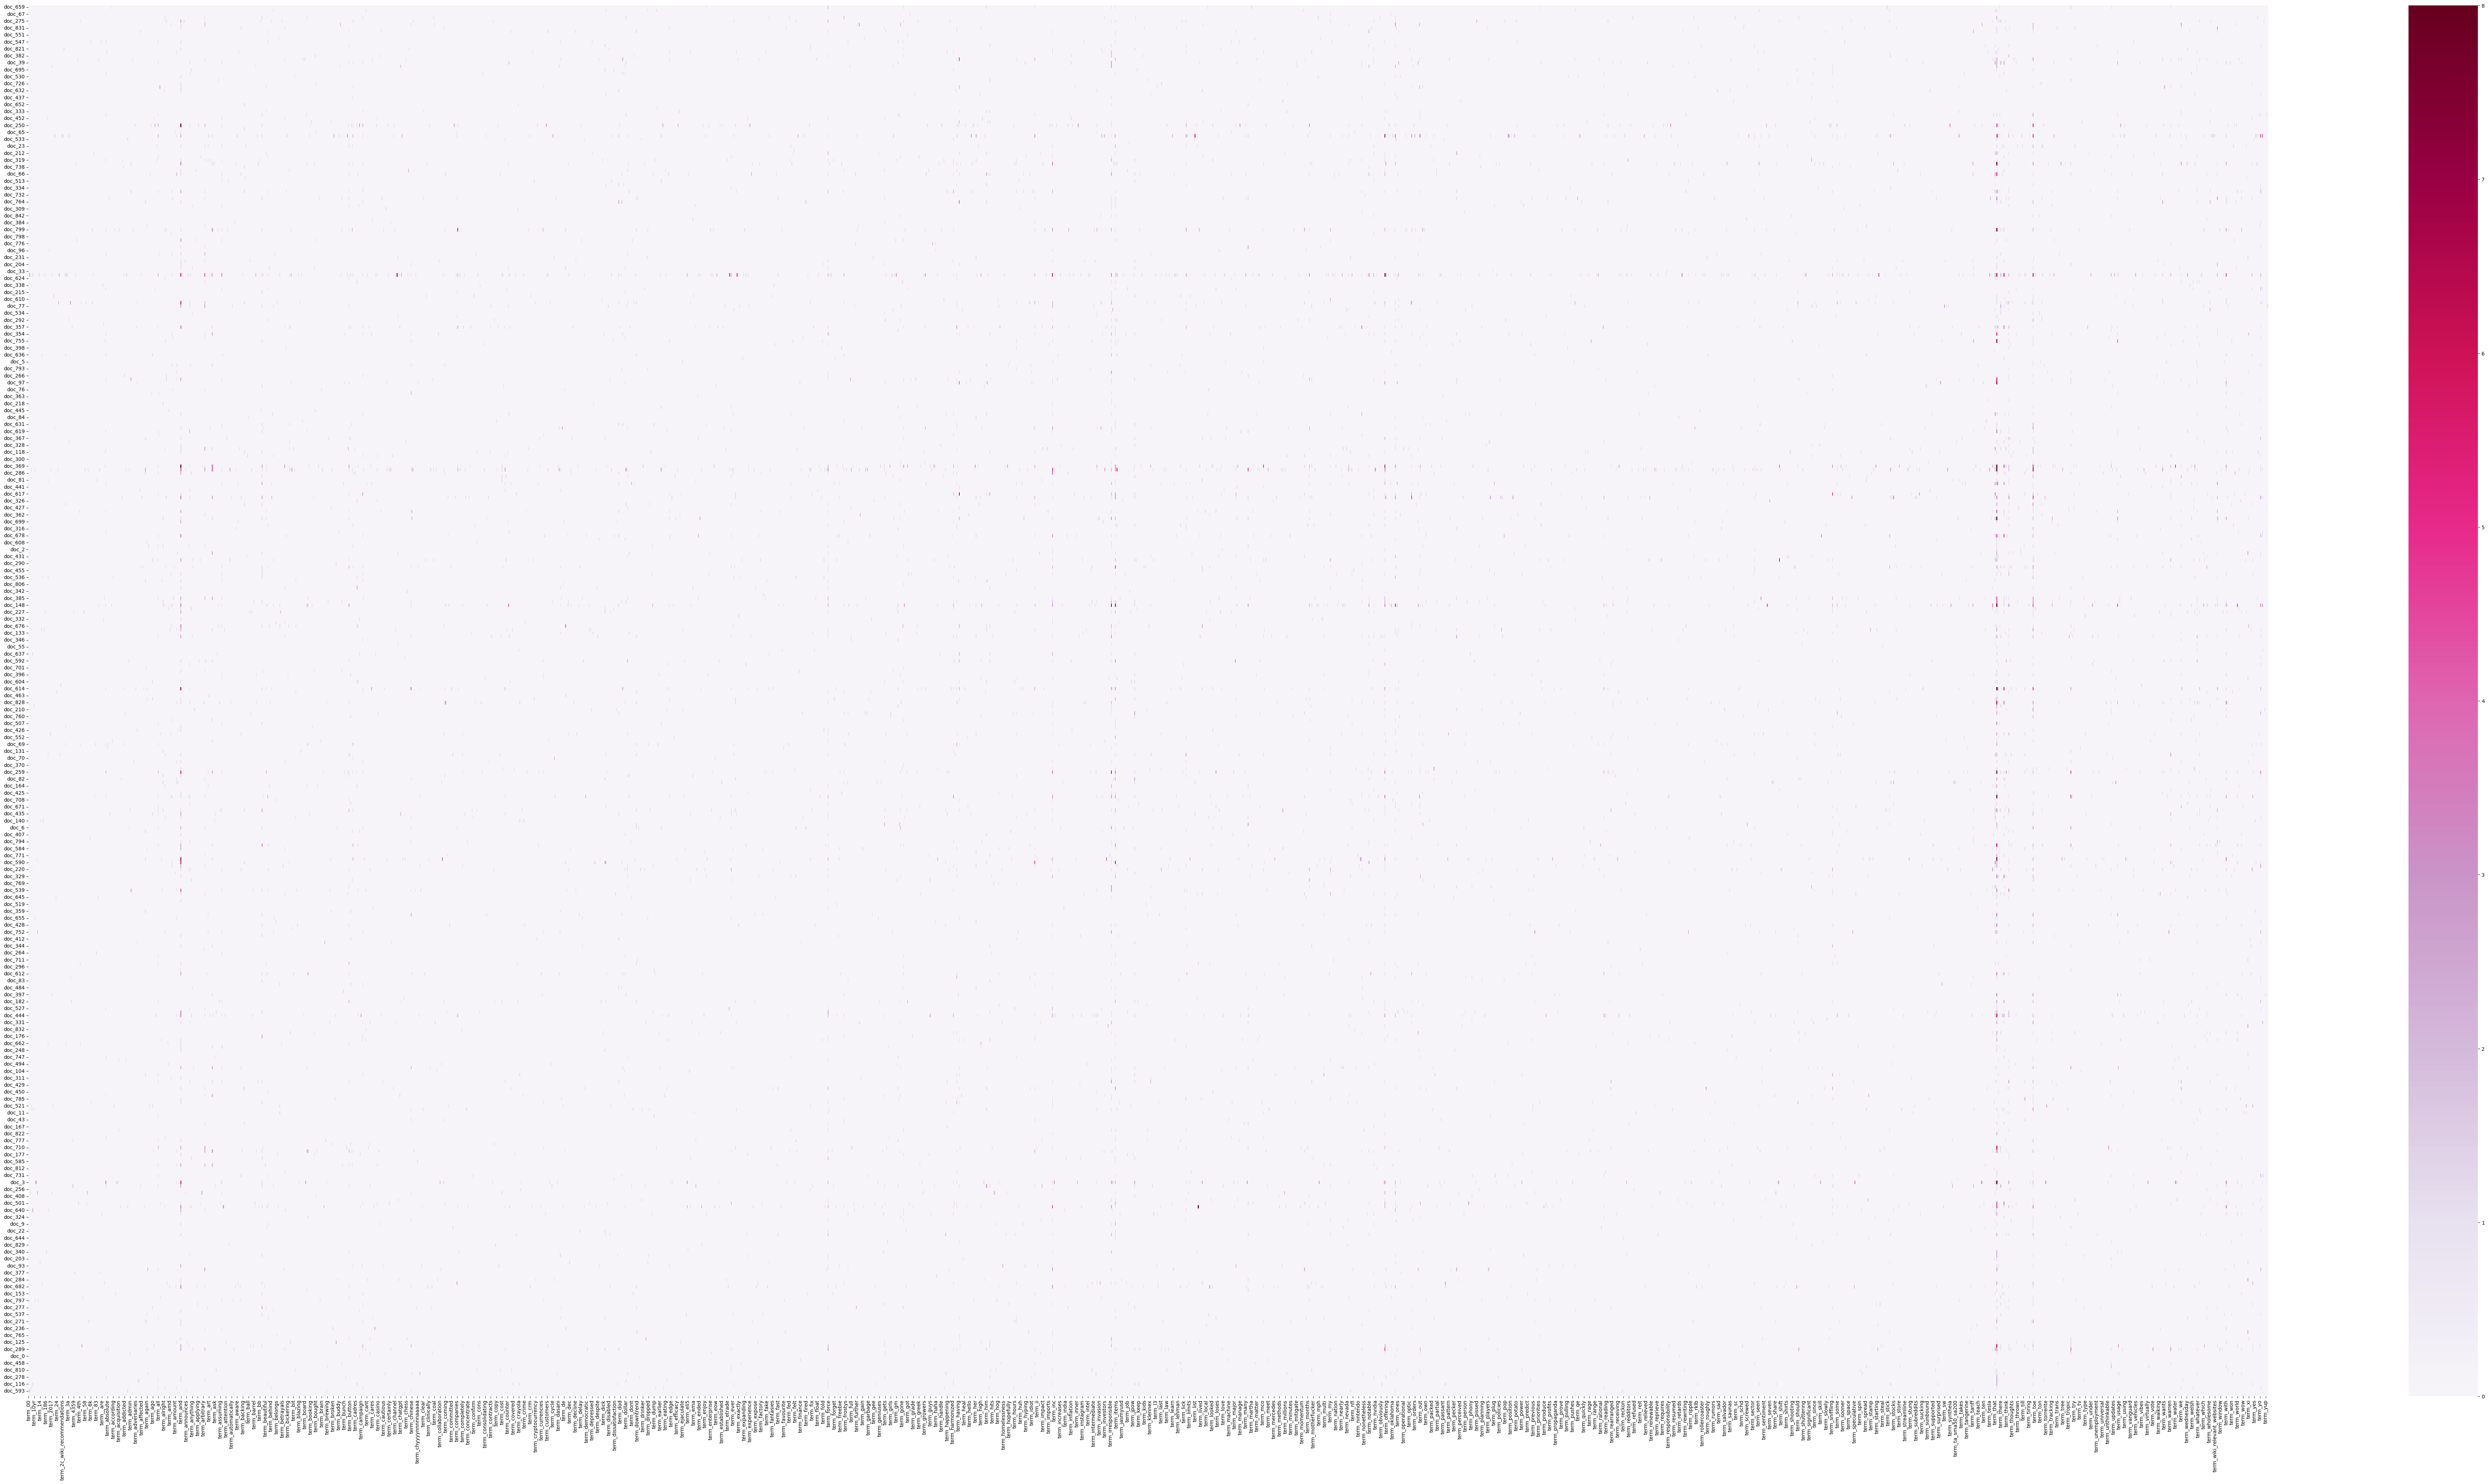

In [260]:
# practice exercise 11: plot the heatplot for sample n=400 term-document matrix.
"""the reason I prefer to do the sample but not entire matrix reason is down below
    因我們著重於觀察某些關鍵詞在這些論壇中出現的頻率，可使用 sample 的方式繪製熱圖，找出最常出現的詞彙
    若使用所有資訊會導致圖面過大難以識別，且運行時間長"""
import seaborn as sns

# build sample's sparse matrix
sample_for_hlt = count_vect.fit_transform(stock_df_sample["text"])
#print(sample_for_hlt)

# 設定 x,y 軸參數
plot_x_sample = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y_sample = ["doc_"+ str(i) for i in stock_df_sample.index]


# 匯入資料
plot_z_sample = sample_for_hlt.toarray()

# 建立圖表
df_todraw_sample = pd.DataFrame(plot_z_sample, columns = plot_x_sample, index = plot_y_sample)
plt.subplots(figsize=(100, 50))
ax = sns.heatmap(df_todraw_sample,
                 cmap="PuRd",
                 vmin=0, vmax=8, annot=False)
df_todraw_sample.shape



# Phase 2

In [228]:
### Begin Assignment Here 
